## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
# read dataset
df = pd.read_csv('ab_data.csv')

# inspect dataset
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
# No. of rows in the dataset
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
# No. of unique users in the dataset
df.user_id.nunique()

290584

d. The proportion of users converted.

In [5]:
# The proportion of users converted
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
# Reference :https://chrisalbon.com/python/data_wrangling/pandas_crosstabs/
# Reference :https://pbpython.com/pandas-crosstab.html
# Counting the number of observations by regiment and category to show the times where new_page and treatment records don't line up

pd.crosstab(df.group, df.landing_page, margins=True)

# The number of times the new_page and treatment don't line up is the sum of (1928 + 1965) = 3893

landing_page,new_page,old_page,All
group,,,
control,1928,145274,147202
treatment,145311,1965,147276
All,147239,147239,294478


In [7]:
treat_old =df.query("group == 'treatment' and landing_page == 'old_page'")
cntrl_new =df.query("group == 'control'   and landing_page == 'new_page'")

#  number of times the new_page and treatment don't line up is sum of above two values
new_page_treatment= treat_old.shape[0] + cntrl_new.shape[0]
print("The number of times new page and treatment don't line up is {}".format((new_page_treatment)))

The number of times new page and treatment don't line up is 3893


f. Do any of the rows have missing values?

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 7.9+ MB


In [9]:
# Check for missing values

df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

Based on the cell above, there are no missing values in the dataset

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [10]:
# Reference: https://www.quora.com/How-should-I-delete-rows-from-a-DataFrame-in-Python-Pandas
# Delete Rows

# drop rows for mismatched treatment groups
df.drop(df.query("group == 'treatment' and landing_page == 'old_page'").index, inplace=True)

# drop rows for mismatched control groups
df.drop(df.query("group == 'control' and landing_page == 'new_page'").index, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 10.0+ MB


In [12]:
# save new clean dataset which contains no duplicates or records with missing or mismatched values
# we will use this dataset in next sections
df.to_csv('ab_edited.csv', index=False)

In [13]:
# define a new dataframe df2 from df where we excluded the 3893 records where new_page and trement didn't line up
df2 = pd.read_csv('ab_edited.csv')

In [14]:
# inspect df2
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290585 entries, 0 to 290584
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 7.8+ MB


In [15]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [16]:
# No. of unique user_ids after cleaning our dataset.

df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [17]:
# check if duplicates in user_id
df2['user_id'].duplicated().sum()

1

c. What is the row information for the repeat **user_id**? 

In [18]:
# Display the information of the repeated user_id
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
2862,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [19]:
# No. of rows before removing the duplicate 
df2.shape

(290585, 5)

In [20]:
# Reference: https://www.geeksforgeeks.org/python-pandas-dataframe-drop_duplicates/
# Drop one of the rows that belongs to the repeated user_id
df2 = df2.drop_duplicates(subset='user_id')

In [21]:
# No. of rows after removing the duplicate 
df2.shape

(290584, 5)

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [22]:
# The probability of an individual converting regardless of the page they receive
convert= df2['converted'].mean()
print("The probability of an individual converting regardless of the page they receive is {}".format(convert))

The probability of an individual converting regardless of the page they receive is 0.11959708724499628


b. Given that an individual was in the `control` group, what is the probability they converted?

In [23]:
# Conversion rate for control group to old page
control_convert= df2.query('group =="control"').converted.mean()
print("The conversion rate for control group to old page is {}".format(control_convert))

The conversion rate for control group to old page is 0.1203863045004612


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [24]:
# Conversion rate for treatment group to new page
treatment_convert= df2.query('group =="treatment"').converted.mean()
print("The conversion rate for treatment group to new page is {}".format(treatment_convert))

The conversion rate for treatment group to new page is 0.11880806551510564


d. What is the probability that an individual received the new page?

In [25]:
# Probability of receiving the new page
p_new_page =(df2['landing_page'] == 'new_page').mean()
print("The probability of receiving the new page is {}".format(p_new_page))

The probability of receiving the new page is 0.5000619442226688


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Answer**
<p style='text-align: justify;'> 
Based on the output above,given that an individual was in the control group, the probability has a slightly higher conversion rate 0.12038 than the treatment group 0.1188, however, these results don't provide a solid evidence if one page leads to more conversions as we still don't know the significance of these results and the factors that might have contributed to the results above.In order to provide a meaningful information to support the decision whether to implement the new page or keep the old page, we need to define our test hypothesis and calculate p-value for the new and old pages.</p>

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.



** Hypothesis**

$H_{0}$ : $p_{old}$ >= $p_{new}$

$H_{1}$ : $p_{old}$ < $p_{new}$


** In other words,**

$H_{0}$ : $p_{new}$ <= $p_{old}$

$H_{1}$ : $p_{new}$ > $p_{old}$


** or,**

$H_{0}$ : $p_{new}$ - $p_{old}$<= 0

$H_{1}$ : $p_{new}$ - $p_{old}$> 0


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [26]:
# As per the instruction above, p_old = p_new = converted rate in ab_data.csv regardless of the page
p_new = df2['converted'].mean()
print("The convert rate for p_new is {}".format(p_new))

The convert rate for p_new is 0.11959708724499628


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [27]:
# As per the instruction above, p_old = p_new = converted rate in ab_data.csv regardless of the page
p_old = df2['converted'].mean()
print("The convert rate for p_old is {}".format(p_old))

The convert rate for p_old is 0.11959708724499628


c. What is $n_{new}$?

In [28]:
n_new = df2.query('landing_page == "new_page"').shape[0]
print("The value of the n_new is {}".format(n_new))

The value of the n_new is 145310


d. What is $n_{old}$?

In [29]:
n_old = df2.query('landing_page == "old_page"').shape[0]
print("The value of the n_old is {}".format(n_old))

The value of the n_old is 145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [30]:
# Refrence :https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.choice.html
new_page_converted = np.random.choice([0, 1], size=n_new, p=[p_new,(1 - p_new)])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [31]:
old_page_converted = np.random.choice([0, 1], size=n_old, p=[p_old,(1 - p_old)])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [32]:
new_page_converted.mean() - old_page_converted.mean()

0.00036709333438933456

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [33]:
p_diffs = []

for _ in range(10000):
    new_page_converted = np.random.choice([0, 1], size=n_new, p=[p_new,(1 - p_new)])
    old_page_converted = np.random.choice([0, 1], size=n_old, p=[p_old,(1 - p_old)])
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

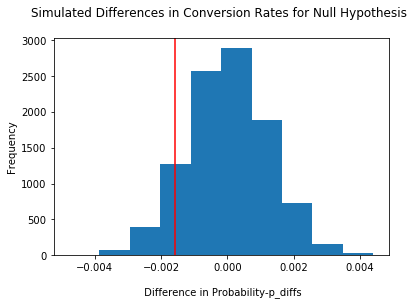

In [34]:
plt.hist(p_diffs)
plt.title("Simulated Differences in Conversion Rates for Null Hypothesis \n")
plt.xlabel("\n Difference in Probability-p_diffs")
plt.ylabel('Frequency')
plt.axvline(treatment_convert - control_convert, color='r');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [35]:
obs_diff = treatment_convert - control_convert

(p_diffs > obs_diff).mean()

0.91120000000000001

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Answer:** 
<p style='text-align: justify;'> 
The value above represents the p-value calculated is 0.9112 of observing the statistic given the Null is true. This is far greater than the typical $\alpha$ level of 0.05 in business studies. (An $\alpha$ level of 0.05 indicates that we have a 5% chance of committing a Type I error if the null is true.) As such, we would fail to reject the Null hypothesis and keep the old page and conclude that there is not sufficient evidence to say that there is a difference between the two values almost similarly.Old pages, as the numbers show, performed slightly better.</p>

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [36]:
import statsmodels.api as sm

convert_old = df2.query("group == 'control'  ").converted.sum()
convert_new = df2.query("group == 'treatment'").converted.sum()
n_old       = df2.query("group == 'control'  ").shape[0]
n_new       = df2.query("group == 'treatment'").shape[0]

C:\Users\mhassan44\AppData\Local\Enthought\Canopy32\edm\envs\User\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [37]:
# Reference: https://www.statsmodels.org/dev/generated/statsmodels.stats.proportion.proportions_ztest.html
z_score, p_value = sm.stats.proportions_ztest([convert_old,convert_new], [n_old,n_new], alternative='smaller')
print("The value of z score  is {} and p value is {}".format(z_score, p_value))

The value of z score  is 1.3109241984234394 and p value is 0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

In [38]:
# Reference :https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

from scipy.stats import norm

# Shows the significance of the z_score

print("The significance of the z_score is {}".format(norm.cdf(z_score)))


The significance of the z_score is 0.9050583127590245


In [39]:
# Assuming 95% confidence level for one-sided test, as mentioned in part II.1

print("The critical value at 95% confidence level is {}".format(norm.ppf(1-(0.05))))

The critical value at 95% confidence level is 1.6448536269514722


**Answer**:
<p style='text-align: justify;'> 
We find that the z-score of 1.3109241984234394 is less than the critical value of 1.6448536269514722, therefore, we would fail to reject the Null Hypothesis , regards the conversion rates of the old and new pages, we find that old pages are only minutely better than new pages, which is consistent with the results in parts j and k.</p>

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Answer:** Since this is a Yes/No type of variable, the appropriate approach is **Logistic Regression**.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [40]:
#creating intercept and dummies
df2['intercept']=1  # add column for interpret
df2[['new_page','old_page']]=pd.get_dummies(df2['landing_page'])
df2['ab_page']= pd.get_dummies(df2['group']) ['treatment']
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [41]:
import statsmodels.api as sm
logit = sm.Logit(df2['converted'],df2[['intercept','ab_page']])

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [42]:
results = logit.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Fri, 29 Mar 2019   Pseudo R-squ.:               8.077e-06
Time:                        18:40:20   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Answer:**

Our hypothesis here is:

$H_{0}$ : $p_{new}$ - $p_{old}$ = 0
    
$H_{1}$ : $p_{new}$ - $p_{old}$ != 0



The p-value (0.190) here remains above an $\alpha$ level of 0.05 but is different because this is a two tailed test. We will still reject the null in this situation.

$$H_0: p_{new} = p_{old}$$$$H_1: p_{new} \neq p_{old}$$

The difference is, in part II, we performed a one-sided test, where in the logistic regression part, it is two-sided test.


f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answer:**
<p style='text-align: justify;'> 
Considering other factors is a good idea as these factors may contribute to the significance of our test results and leads to more accurate decisions. One of the disadvantages of adding additional terms into the regression model is Simpson's paradox where the combined impact of different variables disappears or reverses when these variables are combined, but appears where these variables are tested individually.</p>

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [43]:
# Reference:https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1


In [44]:
df_new['country'].value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [45]:
### Create the necessary dummy variables
df_new[['CA','UK','US']] = pd.get_dummies(df_new['country'])
df_new['country'].astype(str).value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [46]:
# drop CA row to keep two columns
df_new.drop('CA',axis=1,inplace=True)

In [47]:
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page,UK,US
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,1,0


In [48]:
df['intercept'] = 1 # add column for interpret
#Create Logit regression model for country,CA  as baseline
logit3 = sm.Logit(df_new['converted'], df_new[['intercept','UK','US']])
result = logit3.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Fri, 29 Mar 2019   Pseudo R-squ.:               1.521e-05
Time:                        18:40:22   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
US             0.0408      0.027      1.518      0.129      -0.012       0.093
==============================================================================
"""

**Results:**
<p style='text-align: justify;'> 
The p-values for the countries have values above a 0.05 $\alpha$ level. So , we fail to reject the null hypothesis and conclude that based on the output, there is no significant contribution from countries to differences in conversion rates for the two pages. </p>

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [49]:
#Create a new interacton between ab_page and country UK and US
df_new['UK_ab_page'] = df_new['UK'] * df_new['ab_page']
df_new['US_ab_page'] = df_new['US'] * df_new['ab_page']
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page,UK,US,UK_ab_page,US_ab_page
user_id,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,1,0,1,0


In [50]:
#Create logistic regression for the intereaction variable between ab_page and country using dummy variable
df['intercept'] = 1 # add column for interpret
log_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page','UK', 'US', 'UK_ab_page',  'US_ab_page']])
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Fri, 29 Mar 2019   Pseudo R-squ.:               3.482e-05
Time:                        18:40:23   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
US             0.0175      0.038      0.465      0.642      -0.056       0.091
UK_ab_page     0.0783      0.057      1.378      0.168      -0.033       0.190
US_ab_page     0.0469      0.054      0.872      0.383      -0.059       0.152
==============================================================================
"""

**Results:** 
<p style='text-align: justify;'> 
None of the above variables have significant p_values (except intercept) are all above the Type I Error (5%) show NO significant effects on conversion. Therefore, we failed to reject the null hypothesis and conclude that there is not sufficient evidence to suggest that there is an interaction between country and page received that will predict whether a user converts or not.</p>

<p style='text-align: justify;'> 
In the larger picture, based on the available information, we do not have sufficient evidence to suggest that the new page results is more conversions than the old page.</p>

<a id='conclusions'></a>
## Conclusions

- The performance of the old page was found better as computed by different techniques.
- Hence, we faild to reject the Null Hypothesis and Reject the Alternate Hypothesis.
- These inferences are strictly based on data on hand. This analysis acknowledges its limitations due to factors not included in the data. (see part III.f)
- There is no significant contribution from country to differences in conversion rates for the two pages.
- There is not sufficient evidence to suggest that there is an interaction between country and page received that will predict whether a user converts or not.

**Overall, we fail to reject the Null hypothesis.Old_pages should be kept. But if we consider the timestamp as another factors, result may be different.**

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.